<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform EDA Exploratory Data Analysis & determine which Training Labels

*   Create a column for the class
*   Standardize the data
*   Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method that performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# This function is to plot the confusion matrix

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


In [47]:
# load the data
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# option 2 if above does not load
# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [48]:
# load one-hot encoded data to X
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# plan b
# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [49]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


In [80]:
# Standardize the data in X then reassign it to the variable X 
## StandardScaler standardizes a feature by removing the mean and dividing each value by the standard deviation. 
## Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). 
## If you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval. 
## use when: you need to transform a feature has zero mean and unit standard deviation.

#create standardscaler object
transform = preprocessing.StandardScaler()
# fit and transform the data
X = transform.fit_transform(X)
# X -> numpy array now too, just like Y
# train_test_split arguments are to be arrays
X

array([[-1.71291154e+00, -5.29526321e-17, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## train_test_split


In [51]:
# split X and Y into training and test data, 20% to test / 80% to train, random state 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [52]:
# now X_train, X_test, Y_train, Y_test are:
## arrays of integers with dimensions...
print('Dimensions of X_train, X_test, Y_train, Y_test:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
### we only have 18 test samples! (well, that's 20%)

Dimensions of X_train, X_test, Y_train, Y_test: (72, 83) (18, 83) (72,) (18,)


## Logistic Regression


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [53]:
parameters ={'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']} # l1 lasso l2 ridge

In [54]:
# create logistic regression object
lr=LogisticRegression()
# create a gridsearchcv object from lr object
# cv = 10 = 10 folds
logreg_cv = GridSearchCV(lr, param_grid = parameters, cv = 10)
# fit the gridsearchcv object
logreg_cv.fit(X_train, Y_train)
## output the GridSearchCV object for logistic regression

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [55]:
# find the best parameters from parameters
## best_score_= average of all cv folds for a single combination of the parameters on training data
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
### C = 0.01, C inverse of regularization strength; smaller values specify stronger regularization
### penalty = l2 - specify norm of the penalty 'l2': add a L2 penalty term and it is the default choice
### solver = lbfgs - algorithm to use in the optimization problem, handles multinomial loss, works with l2
### accuracy = 84.6% on train data 

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [56]:
# Calculate the accuracy on the test data - method score
logreg_cv_test_score = logreg_cv.score(X_test, Y_test)
logreg_cv_test_score
# the parameters identified yield accuracy of 83.3% with the tuned logistic regression model

0.8333333333333334

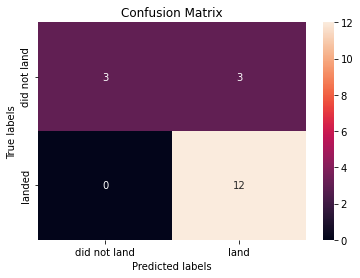

In [57]:
# Confusion matrix (using logreg_cv = using new and improved lr)
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
# display of Type I and II Error on test data

## Support Vector Machine

In [58]:
# define parameters to test in a dictionary
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),'C': np.logspace(-3, 3, 5),'gamma':np.logspace(-3, 3, 5)}
# create a support vector machine object
svm = SVC()
# create a gridsearchcv object svm_cv with cv=10 = 10 folds, and fit to find the best parameters from parameters
svm_cv = GridSearchCV(svm, param_grid = parameters, cv = 10)
# fit the gridsearchcv object
svm_cv.fit(X_train, Y_train)
## output the GridSearchCV object for support vector machine

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [59]:
# find the best parameters from parameters
## best_score_= average of all cv folds for a single combination of the parameters on training data
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
# best:
# C = 1.0 - regularization parameter - strength of the regularization inversely proportional to C
# gamma = 0.03162277660168379 - kernel coefficient
# kernel = sigmoid - specifies kernel type in the algorithm-if a callable is given-used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
# accuracy = 84.8% on train data (vs 84.6% with logistic regression)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [60]:
# Calculate the accuracy on the test data - method score
svm_test_score = svm_cv.score(X_test, Y_test)
svm_test_score
# the parameters identified yield accuracy of 83.3% on test data with the tuned support vector machine

0.8333333333333334

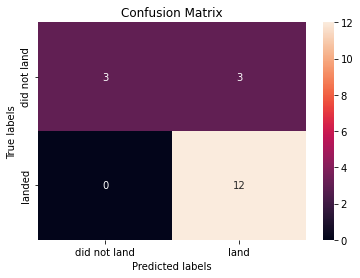

In [61]:
# plot confusion matrix
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
# svm Type I and II Error = lr

## Decision Tree Classifier

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [62]:
# define parameters to test in a dictionary
parameters = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10]}
# create a decision tree classifier object
tree = DecisionTreeClassifier()
# create a gridsearchcv object tree_cv with cv=10 = 10 folds, and fit to find the best parameters from parameters
tree_cv = GridSearchCV(tree, param_grid = parameters, cv = 10)
# fit the gridsearchcv object to train data
tree_cv.fit(X_train, Y_train)
## output the GridSearchCV object for decision tree classifier

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [63]:
# find the best parameters from parameters
## best_score_= average of all cv folds for a single combination of the parameters on training data
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
# best:
# 'criterion': 'entropy' - for the Shannon information gain
#'max_depth': 4 - maximum depth of the tree. 
#'max_features': 'sqrt' - number of features to consider when looking for the best split
## “sqrt”, then max_features=sqrt(n_features)
## If None, default, then max_features=n_features
#'min_samples_leaf': 1 - minimum number of samples required to be at a leaf node. 
## split point at any depth will only be considered if it leaves at least min_samples_leaf training samples 
## in each of the left and right branches
#'min_samples_split': 10 - minimum number of samples required to split an internal node
#'splitter': 'best' - strategy used to choose the split at each node, default best
## best - to choose the best split (vs best random)
# accuracy = 90.4% on train data (vs svm 84.8% and log reg 84.6%)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9035714285714287


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [64]:
# Calculate the accuracy on the test data - method score
tree_test_score = tree_cv.score(X_test, Y_test)
tree_test_score
# the parameters identified yield accuracy of 83.3% on test data with the tuned tree, same as SVM and LR

0.8333333333333334

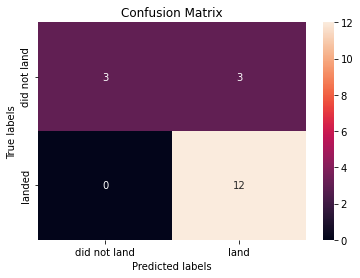

In [65]:
# plot confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
# svm, log reg, and tree: same Type I and II Error

## k Nearest Neighbors


In [66]:
# define parameters to test in a dictionary
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
# create a k nearest neighbor object
KNN = KNeighborsClassifier()
# create a gridsearchcv object knn_cv with cv=10 = 10 folds, and fit to find the best parameters from parameters
knn_cv = GridSearchCV(KNN, param_grid = parameters, cv = 10)
# fit the gridsearchcv object to train data
knn_cv.fit(X_train, Y_train)
## output the GridSearchCV object for k nearest neighbor classifier

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [67]:
# find the best parameters from parameters
## best_score_= average of all cv folds for a single combination of the parameters on training data
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
# best:
# 'algorithm': 'auto' - Algorithm used to compute the nearest neighbors:
## default is auto: will attempt to decide the most appropriate algorithm based on the values passed to fit method
# 'n_neighbors': 10 - number of neighbors to use by default for kneighbors queries
# 'p': 1 - power parameter for the Minkowski metric. 
## when p = 1, this is equivalent to using manhattan_distance (l1)
# knn accuracy = 84.8% on train data (vs tree 90.4% svm 84.8% and log reg 84.6%)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [68]:
# Calculate the accuracy on the test data - method score
knn_test_score = knn_cv.score(X_test, Y_test)
knn_test_score
# the parameters identified yield accuracy of 83.3% on test data with the tuned knn

0.8333333333333334

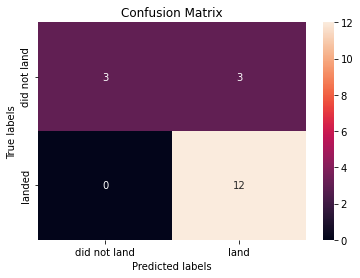

In [69]:
# Confusion Matrix
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
# knn, svm, log reg, and tree: all same Type I and II Error

## Find the method that performs best:


### Confusion Matrix

### [[TN FP]
###  [FN TP]]

* false positives: 3 predicted to land, but failed 
* false negatives: 0 predicted to fail, but landed
* great at predicting: landing
* not so great at predicting: failure (false positive issue) - NO implications bad!

### Accuracy Score with method score
* all models = 83.3%

### Classification Reports
* these evaluation metrics should provide greater insight into comparative performance of algorithms with the best_parameters

In [72]:
from sklearn.metrics import classification_report

In [81]:
yhat_logreg=logreg_cv.predict(X)
yhat_svm_cv=svm_cv.predict(X)
yhat_tree_cv = tree_cv.predict(X)
yhat_knn_cv = knn_cv.predict(X)

In [82]:
print("Logistic Regression Classification Report:\n", classification_report(Y, yhat_logreg))
print("Support Vector Machine Classification Report:\n", classification_report(Y, yhat_svm_cv))
print("Decision Tree Classification Report:\n", classification_report(Y, yhat_tree_cv))
print("K Nearest Neighbor Classification Report:\n", classification_report(Y, yhat_knn_cv))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        30
           1       0.83      1.00      0.91        60

    accuracy                           0.87        90
   macro avg       0.92      0.80      0.83        90
weighted avg       0.89      0.87      0.86        90

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.78        30
           1       0.85      1.00      0.92        60

    accuracy                           0.88        90
   macro avg       0.92      0.82      0.85        90
weighted avg       0.90      0.88      0.87        90

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.60      0.73        30
           1       0.83      0.98      0.90        60

    accuracy                           0.86        90

In [4]:
import pandas as pd

In [8]:
model_selection_df = pd.DataFrame({ 'Model':['Logistic Regression', 'Support Vector Machine', 
                                              'Decision Tree', 'K Nearest Neighbor'], 
                                   'Precision Predicting Landing Success': [0.83, 0.85, 0.83, 0.83], 
                                   'Recall Predicting Landing Success': [1,1,0.98,0.98], 
                                   'F1 Score Predicting Landing Failure':[0.75,0.78,0.73,0.73],
                                   'F1 Score Weighted Average': [0.86, 0.87, 0.85, 0.85]})
model_selection_df

,Model,Precision Predicting Landing Success,Recall Predicting Landing Success,F1 Score Predicting Landing Failure,F1 Score Weighted Average
0,Logistic Regression,0.83,1.00,0.75,0.86
1,Support Vector Machine,0.85,1.00,0.78,0.87
2,Decision Tree,0.83,0.98,0.73,0.85
3,K Nearest Neighbor,0.83,0.98,0.73,0.85


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

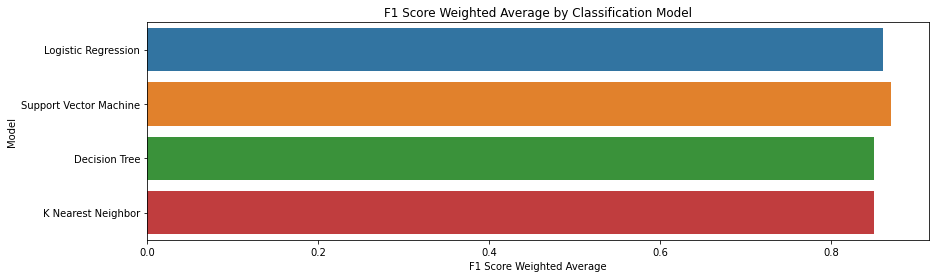

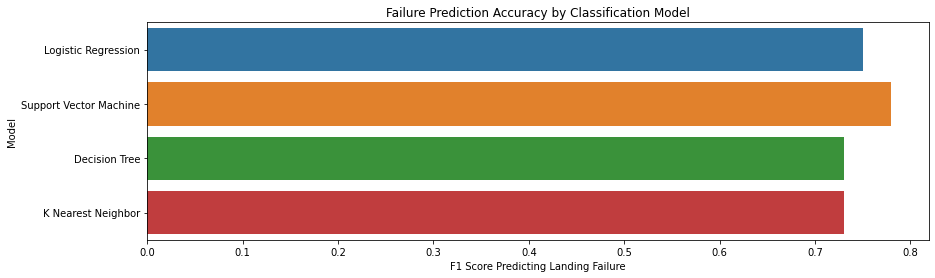

In [16]:
# Visualize the built model accuracy 
plt.figure(figsize=(14,4))
plt.title("F1 Score Weighted Average by Classification Model")
plot = sns.barplot(x='F1 Score Weighted Average',y='Model', data=model_selection_df)
# Visualize the built model accuracy 
plt.figure(figsize=(14,4))
plt.title("Failure Prediction Accuracy by Classification Model")
plot = sns.barplot(x='F1 Score Predicting Landing Failure',y='Model', data=model_selection_df)

### Evaluation of Classification Reports (Test Data Classification Performance)
* Precision: SVM 85%, a greater percentage of SVM predictions were correct vs. all other models, greater accuracy of positive predictions (TP/(TP + FP))
* Recall: SVM 100% of successful landings were caught, greater ability to find all positive instances (TP/(TP+FN)) compared to Decision Tree and KNN
* F1 Score Predicting Failure: SVM 78%, a greater percentage of correct failure to land predictions
* F1 Score Weighted Average: SVM 87%, greatest of all models

*Weighted Average F1 Score: it is suggested to compare models on the weighted average of F1 as opposed to global accuracy, as this calculation takes the mean of all per-class F1 scores and considers each class's support* 

# Best Choice #
# Support Vector Machine 

with the following parameters:
C = 1.0, gamma = 0.03162277660168379, and kernel = 'sigmoid'

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
